<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Multiple_Time_Series_Modeling_Using_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import seaborn as sns   

In [31]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Aotizhongxin_20130301-20170228.csv to PRSA_Data_Aotizhongxin_20130301-20170228 (1).csv
Saving PRSA_Data_Changping_20130301-20170228.csv to PRSA_Data_Changping_20130301-20170228 (1).csv
Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228 (1).csv
Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228 (1).csv
Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228 (1).csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228 (1).csv
Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228 (1).csv
Saving PRSA_Data_Nongzhanguan_20130301-20170228.csv to PRSA_Data_Nongzhanguan_20130301-20170228 (1).csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228 (1).csv
Saving PRSA_Data_Tiantan_20130301-20170228.csv to PRSA_Data_Tiantan_20130301-20170228 (1).csv
Saving PRSA_Data_Wanliu_20130301-201

In [32]:
df_check = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [33]:
df_check.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [34]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [35]:
df1 = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df2 = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df3 = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df4 = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df5 = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df6 = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df7 = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df8 = pd.read_csv('PRSA_Data_Nongzhanguan_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df9 = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df10 = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df11 = pd.read_csv('PRSA_Data_Wanliu_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)
df12 = pd.read_csv('PRSA_Data_Wanshouxigong_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [36]:
total_df = pd.concat([df1,df2,df3],ignore_index=True, sort=False)

In [37]:
df1.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [38]:
df2.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013-03-01 01:00:00,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [39]:
df3.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [40]:
total_df.tail()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
105187,2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
105188,2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
105189,2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
105190,2017-02-28 22:00:00,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling
105191,2017-02-28 23:00:00,35064,2017,2,28,23,13.0,16.0,4.0,9.0,500.0,74.0,7.0,1009.4,-12.2,0.0,N,1.9,Dingling


In [41]:
total_df.columns

Index(['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5',
       'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd',
       'WSPM', 'station'],
      dtype='object')

In [42]:
total_df.drop(columns='No',inplace=True)

In [43]:
total_df.columns

Index(['year_month_day_hour', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10',
       'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM',
       'station'],
      dtype='object')

In [44]:
total_df = total_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [45]:
total_df.head(20)

PM2.5        PM10         SO2  \
station      year_month_day_hour                                       
Aotizhongxin 2013-03-01             7.125000   10.750000   11.708333   
             2013-03-02            30.750000   42.083333   36.625000   
             2013-03-03            76.916667  120.541667   61.291667   
             2013-03-04            22.708333   44.583333   22.869565   
             2013-03-05           148.875000  183.791667   93.875000   
             2013-03-06           223.250000  265.166667  116.236700   
             2013-03-07           263.375000  316.083333   97.541667   
             2013-03-08           221.458333  297.958333   68.563026   
             2013-03-09            62.041667  211.086957   33.333333   
             2013-03-10            34.291667   68.916667   22.916667   
             2013-03-11           123.791667  178.291667   86.875000   
             2013-03-12           122.791667  117.166667   27.500000   
             2013-03-13            16.041667   19.333333   16.250000   
             2013-03-14            95.166667  107.291667   51.916667   
             2013-03-15           212.291667  250.625000   75.583333   
             2013-03-16           244.875000  257.916667   70.125000   
             2013-03-17           284.541667  309.666667   73.666667   
             2013-03-18            70.666667  118.041667   19.625000   
             2013-03-19            41.000000   49.125000   16.500000   
             2013-03-20            48.916667   47.791667   12.500000   

                                         NO2           CO         O3  \
station      year_month_day_hour                                       
Aotizhongxin 2013-03-01            22.583333   429.166667  63.875000   
             2013-03-02            66.666667   824.916667  29.750000   
             2013-03-03            81.000000  1620.625000  19.125000   
             2013-03-04            46.956522   617.391304  53.750000   
             2013-03-05           132.833333  2357.958333  68.458333   
             2013-03-06           142.059383  3108.347826  19.750000   
             2013-03-07           147.750000  3632.875000  38.833333   
             2013-03-08           118.835952  2581.454545  79.333333   
             2013-03-09            45.000000  1178.958333  73.916667   
             2013-03-10            49.666667   708.333333  82.666667   
             2013-03-11            90.666667  1670.750000  75.250000   
             2013-03-12            72.875000  1634.695652  36.583333   
             2013-03-13            36.083333   504.166667  71.875000   
             2013-03-14            70.375000  1337.291667  68.916667   
             2013-03-15            99.416667  2116.500000  44.208333   
             2013-03-16            90.375000  2173.608696  66.666667   
             2013-03-17           113.875000  2558.000000  96.541667   
             2013-03-18            46.166667   866.583333  89.041667   
             2013-03-19            49.166667   800.000000  19.727273   
             2013-03-20            41.541667   920.833333  32.083333   

                                       TEMP         PRES       DEWP      RAIN  \
station      year_month_day_hour                                                
Aotizhongxin 2013-03-01            1.391667  1026.875000 -18.745833  0.000000   
             2013-03-02            0.616667  1026.850000 -15.937500  0.000000   
             2013-03-03            5.566667  1014.608333 -12.316667  0.000000   
             2013-03-04            9.962500  1017.650000 -11.683333  0.000000   
             2013-03-05            6.291667  1010.900000  -7.525000  0.000000   
             2013-03-06            7.183333  1007.483333  -4.216667  0.000000   
             2013-03-07            9.287500  1002.320833  -2.033333  0.000000   
             2013-03-08            9.612500   999.475000  -1.150000  0.000000   
             2013-03-09            6.983333  1004.391667 -1

In [46]:
total_df = total_df.reset_index()

In [47]:
total_df.tail()

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
4378,Dingling,2017-02-24,12.666667,21.541667,5.708333,8.708333,370.833333,74.416667,5.350000,1015.908333,-12.120833,0.0,2.737500
4379,Dingling,2017-02-25,13.125000,19.125000,4.791667,10.250000,437.500000,73.583333,6.737500,1013.820833,-10.187500,0.0,2.512500
4380,Dingling,2017-02-26,26.583333,36.708333,9.916667,23.625000,629.166667,65.291667,6.958333,1015.095833,-7.470833,0.0,1.670833
4381,Dingling,2017-02-27,52.333333,65.958333,12.125000,42.458333,712.500000,52.166667,7.612500,1012.050000,-7.483333,0.0,1.591667
4382,Dingling,2017-02-28,13.125000,22.041667,6.347826,10.608696,391.304348,80.708333,10.187500,1010.116667,-11.704167,0.0,2.350000


In [48]:
total_df['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling'], dtype=object)

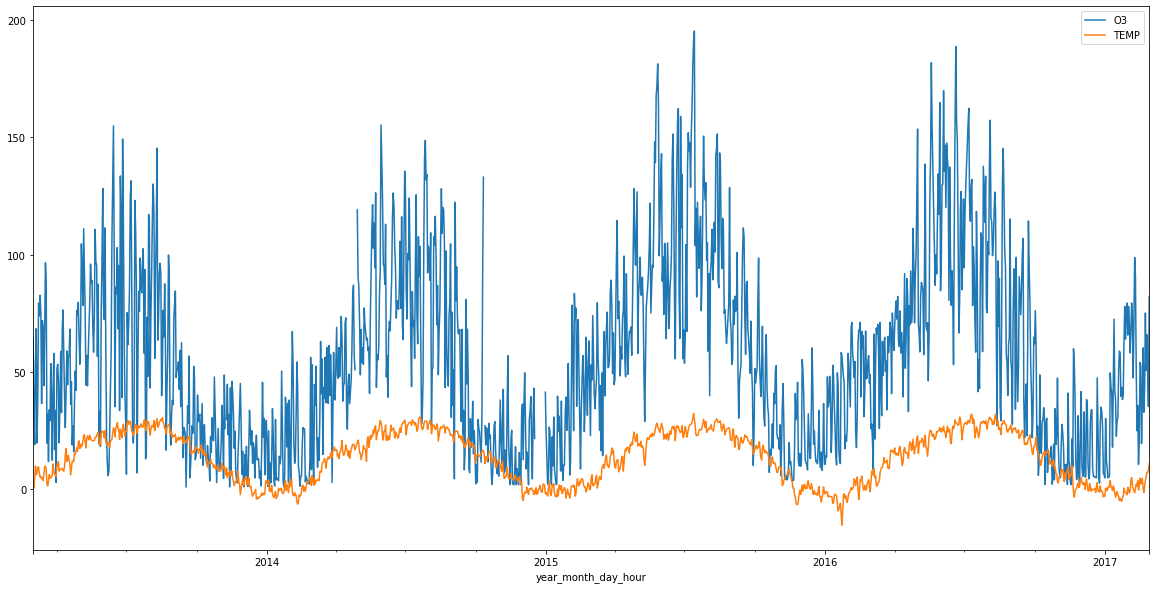

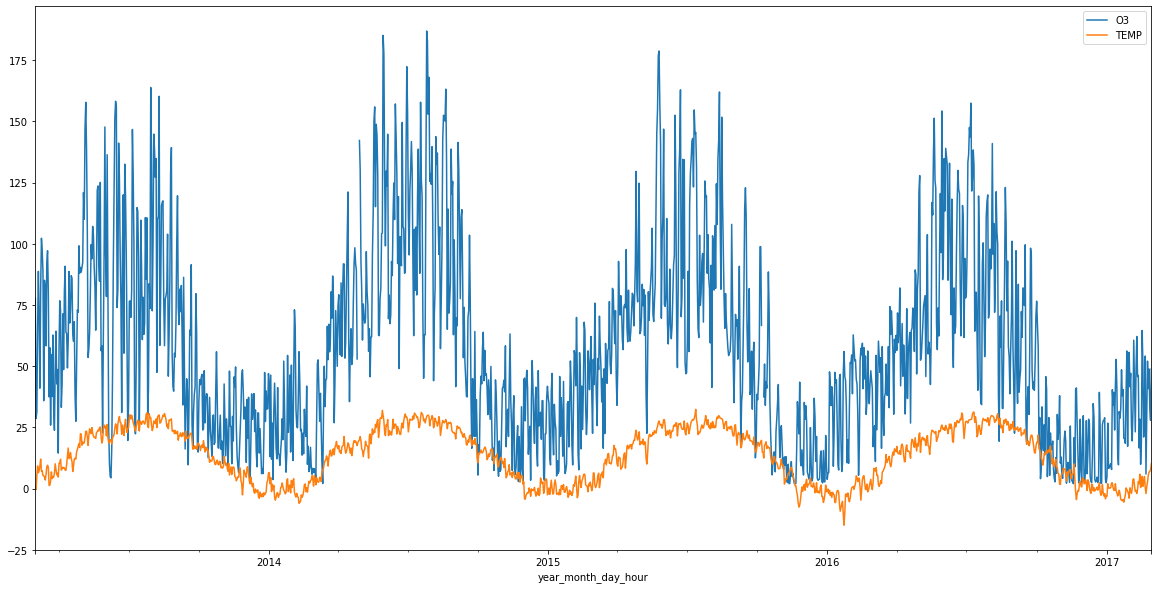

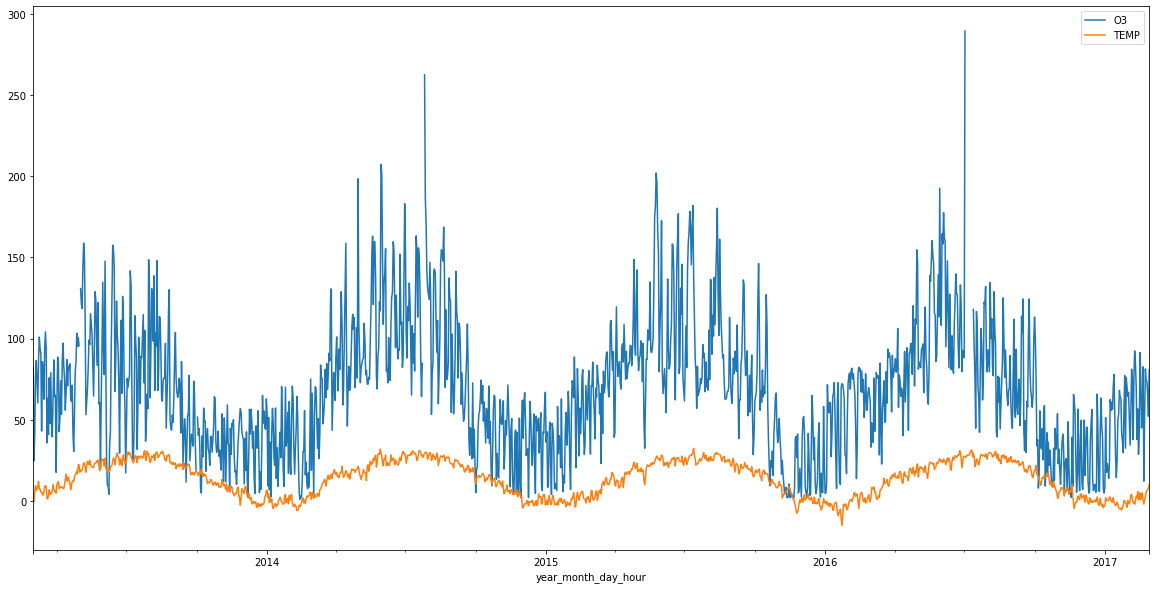

In [49]:
total_df.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot(figsize=(20,10));

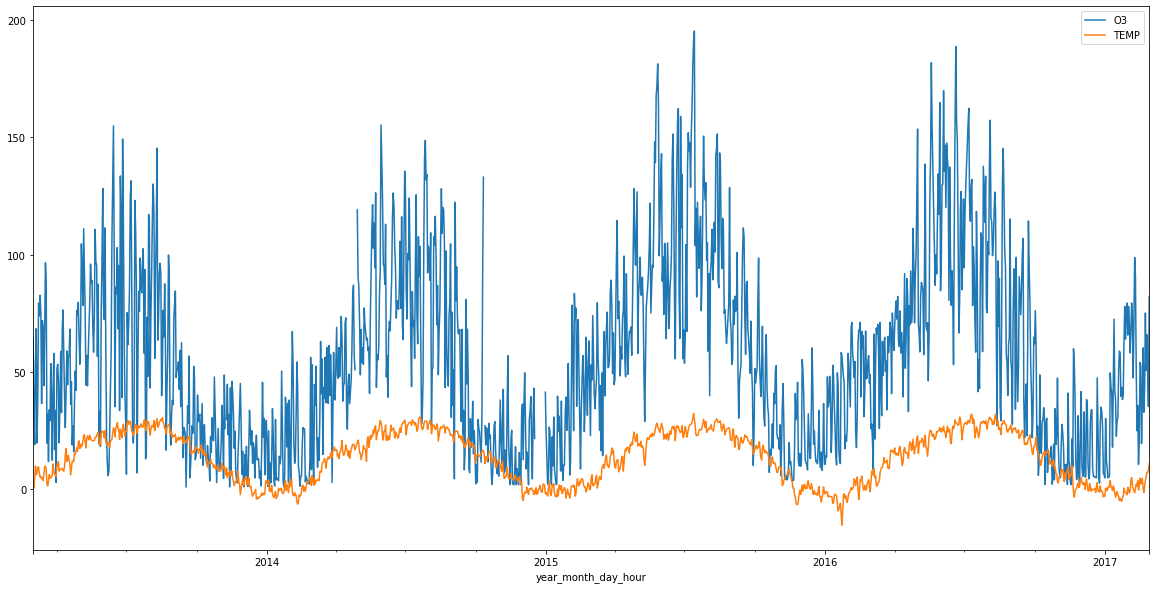

In [50]:
total_df.set_index('year_month_day_hour').query("station=='Aotizhongxin'")[['O3','TEMP']].plot(figsize=(20,10));

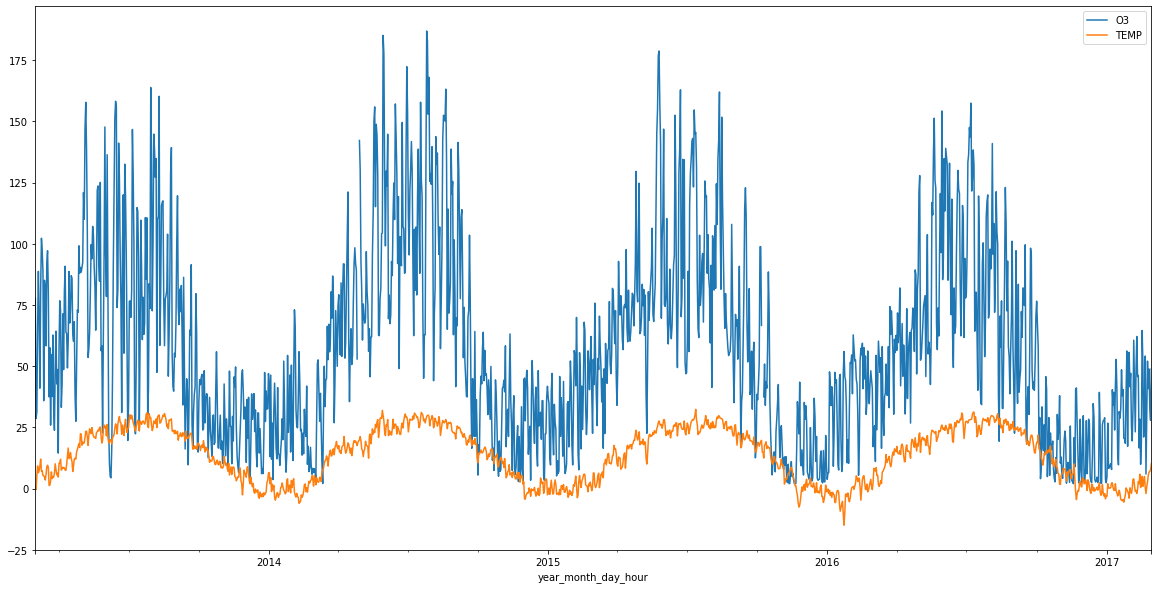

In [51]:
total_df.set_index('year_month_day_hour').query("station=='Changping'")[['O3','TEMP']].plot(figsize=(20,10));

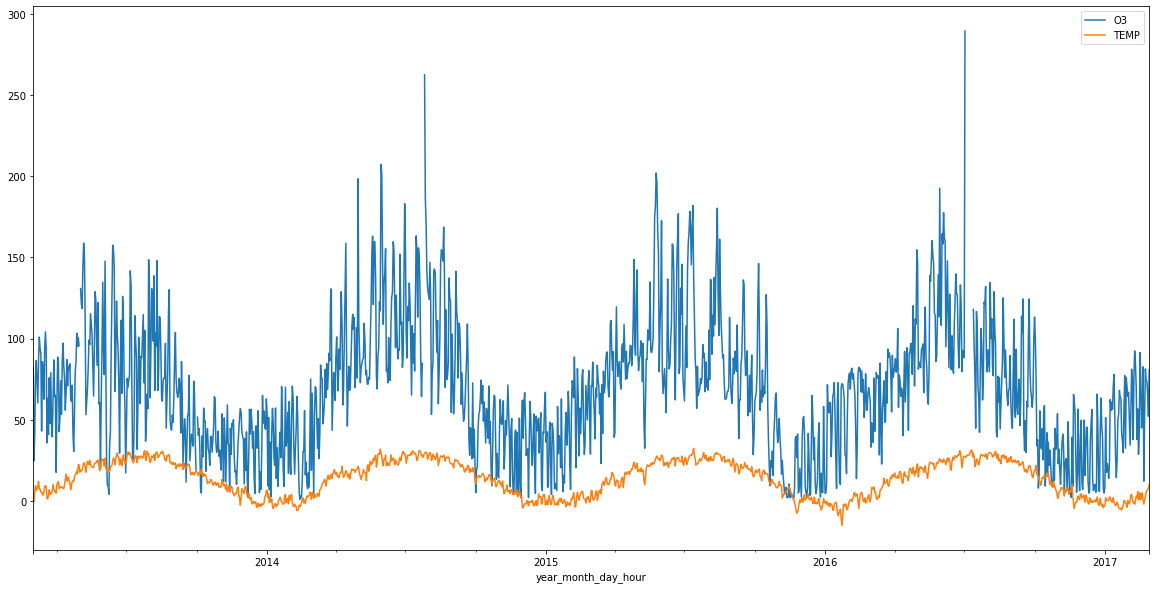

In [52]:
total_df.set_index('year_month_day_hour').query("station=='Dingling'")[['O3','TEMP']].plot(figsize=(20,10));

In [53]:
from fbprophet import Prophet

In [54]:
total_df_final = total_df[['year_month_day_hour','O3','TEMP','station']].rename({'year_month_day_hour':'ds','O3':'y'}, axis='columns')

In [55]:
total_df_final.head()

,ds,y,TEMP,station
0,2013-03-01,63.875000,1.391667,Aotizhongxin
1,2013-03-02,29.750000,0.616667,Aotizhongxin
2,2013-03-03,19.125000,5.566667,Aotizhongxin
3,2013-03-04,53.750000,9.962500,Aotizhongxin
4,2013-03-05,68.458333,6.291667,Aotizhongxin


In [56]:
stations = total_df_final.groupby('station')

In [57]:
stations.tail()

,ds,y,TEMP,station
1456,2017-02-24,50.791667,5.166667,Aotizhongxin
1457,2017-02-25,65.875000,7.245833,Aotizhongxin
1458,2017-02-26,48.625000,7.208333,Aotizhongxin
1459,2017-02-27,35.272727,8.337500,Aotizhongxin
1460,2017-02-28,82.208333,10.958333,Aotizhongxin
2917,2017-02-24,40.833333,5.350000,Changping
2918,2017-02-25,48.833333,6.737500,Changping
2919,2017-02-26,32.791667,6.958333,Changping
2920,2017-02-27,27.875000,7.612500,Changping
2921,2017-02-28,48.913043,10.187500,Changping


In [59]:
for station in stations.groups:
  group = stations.get_group(station)

In [68]:
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


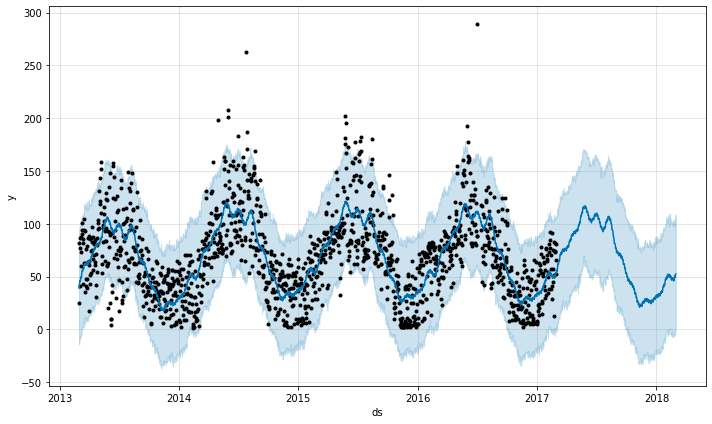

In [69]:
model = Prophet(interval_width=0.95)
model.fit(group)
future = model.make_future_dataframe(periods=366)
forecast = model.predict(future)  
model.plot(forecast)  
forecast = forecast.rename(columns={'yhat': 'yhat_'+station})
target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [70]:
target

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Dingling
ds,,,,,,,,,,,,,,,,,,
2013-03-01,55.389530,-14.459606,91.494081,55.389530,55.389530,-16.330869,-16.330869,-16.330869,-1.913467,-1.913467,-1.913467,-14.417401,-14.417401,-14.417401,0.0,0.0,0.0,39.058661
2013-03-02,55.414291,-13.912733,95.767379,55.414291,55.414291,-13.317939,-13.317939,-13.317939,-0.093880,-0.093880,-0.093880,-13.224060,-13.224060,-13.224060,0.0,0.0,0.0,42.096352
2013-03-03,55.439052,-7.612690,98.710827,55.439052,55.439052,-10.911191,-10.911191,-10.911191,1.031766,1.031766,1.031766,-11.942957,-11.942957,-11.942957,0.0,0.0,0.0,44.527861
2013-03-04,55.463812,-9.083450,97.468014,55.463812,55.463812,-9.583994,-9.583994,-9.583994,1.008304,1.008304,1.008304,-10.592298,-10.592298,-10.592298,0.0,0.0,0.0,45.879818
2013-03-05,55.488573,-8.424343,97.873122,55.488573,55.488573,-10.066235,-10.066235,-10.066235,-0.874502,-0.874502,-0.874502,-9.191733,-9.191733,-9.191733,0.0,0.0,0.0,45.422337
2013-03-06,55.513334,-5.836928,103.429256,55.513334,55.513334,-7.116955,-7.116955,-7.116955,0.644879,0.644879,0.644879,-7.761834,-7.761834,-7.761834,0.0,0.0,0.0,48.396379
2013-03-07,55.538094,-3.979923,102.853242,55.538094,55.538094,-6.126638,-6.126638,-6.126638,0.196900,0.196900,0.196900,-6.323538,-6.323538,-6.323538,0.0,0.0,0.0,49.411456
2013-03-08,55.562855,-5.758831,105.002372,55.562855,55.562855,-6.811066,-6.811066,-6.811066,-1.913467,-1.913467,-1.913467,-4.897598,-4.897598,-4.897598,0.0,0.0,0.0,48.751789
2013-03-09,55.587616,-1.985365,104.589505,55.587616,55.587616,-3.597911,-3.597911,-3.597911,-0.093880,-0.093880,-0.093880,-3.504031,-3.504031,-3.504031,0.0,0.0,0.0,51.989705
